# Imports

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from src.utils import arr_to_dict

# EDA

#### 1. Выгрузим и обработаем данные.

In [2]:
data_arr = np.load("data/train_samples.win500.npy", allow_pickle=True)
data = arr_to_dict(data_arr)

test_data_arr = np.load("data/two_stage_test.npy", allow_pickle=True)
test_data = arr_to_dict(test_data_arr)

#### 2. Оценим распределение по классам.

In [3]:
data_unique, data_counts = np.unique(data['label'], return_counts=True)
test_data_unique, test_data_counts = np.unique(test_data['label'], return_counts=True)

data_class_count = (
    pd.DataFrame({'class_name': data_unique, 'n_samples': data_counts})
    .sort_values('n_samples', ascending=False)
)

test_data_class_count = (
    pd.DataFrame({'class_name': test_data_unique, 'n_samples': test_data_counts})
    .sort_values('n_samples', ascending=False)
)

In [8]:
data_class_count.head(8)

,class_name,n_samples
7,Sleep stage W,231552
2,Sleep stage 2,50928
6,Sleep stage R,23784
1,Sleep stage 1,9984
3,Sleep stage 3,4776
4,Sleep stage 4,3444
5,Sleep stage ?,72
0,Movement time,12


In [9]:
test_data_class_count.head()

,class_name,n_samples
0,Sleep stage 4,8208
1,Sleep stage W,7488


Для обучения будут использоваться только классы `Sleep stage 4` и `Sleep stage W`. Видно, что имеется сильный дисбаланс этих классов в обучающей выборке.

#### 3. Оценим насколько похожи данные в обучающей и тестовой выборках.

Построим распредления амплитуд сигналов для обучающей и тестовой выборок для обоих каналов.

***Fpz***

Text(0.5, 1.0, 'Test data (Fpz)')

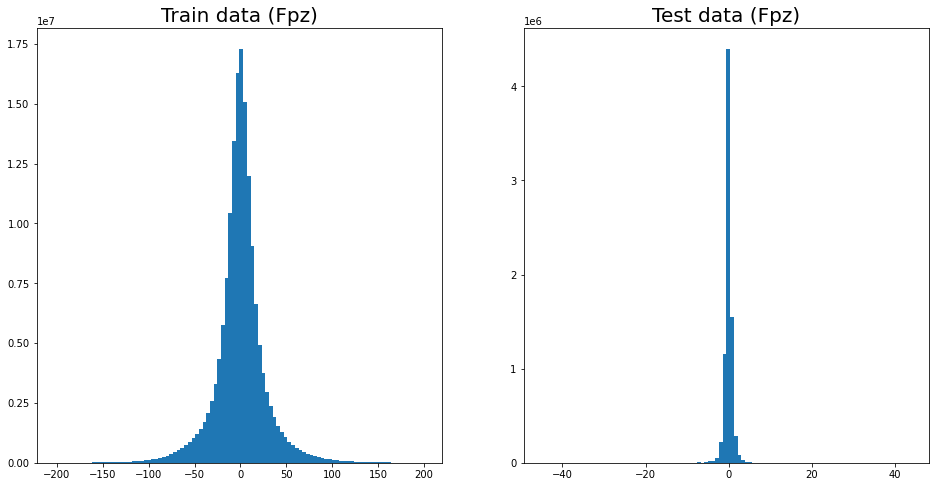

In [72]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
_ = ax[0].hist(data['signal_1'].reshape(-1), bins=100)
_ = ax[1].hist(test_data['signal_1'].reshape(-1), bins=100)

ax[0].set_title('Train data (Fpz)', fontsize=20)
ax[1].set_title('Test data (Fpz)', fontsize=20)

***Pz***

Text(0.5, 1.0, 'Test data (Pz)')

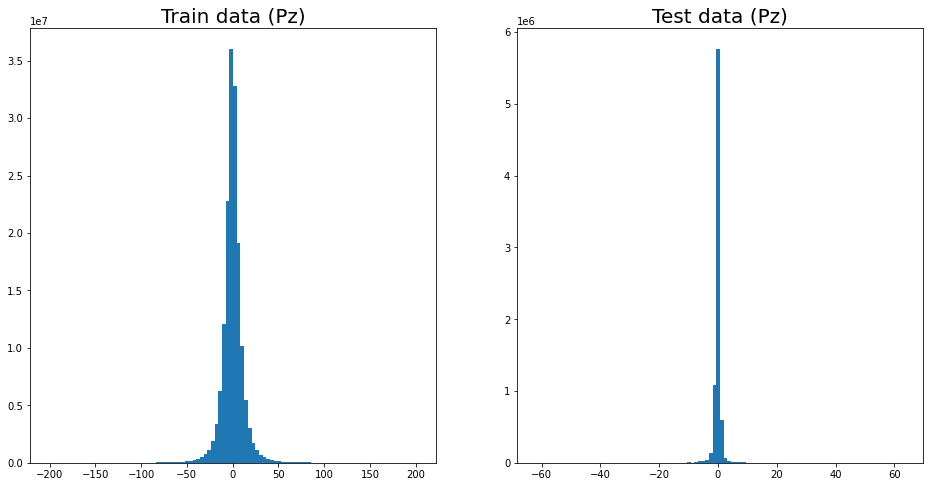

In [73]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
_ = ax[0].hist(data['signal_2'].reshape(-1), bins=100)
_ = ax[1].hist(test_data['signal_2'].reshape(-1), bins=100)

ax[0].set_title('Train data (Pz)', fontsize=20)
ax[1].set_title('Test data (Pz)', fontsize=20)

Из графиков видно, что распредления отличаются. Это можно объяснить тем, что эти выбороки собирались по-разному, в обучающей выборке используются данные `Sleep Cassette`, а в тестовой `Sleep Telemetry`.